In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

Load the dataset

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

Publication date trends

In [4]:
df['publication_date'] = pd.to_datetime(df['date'])
df['publication_day'] = df['publication_date'].dt.day_name()
publication_trends = df.groupby('publication_day').size()

Publication frequency over time

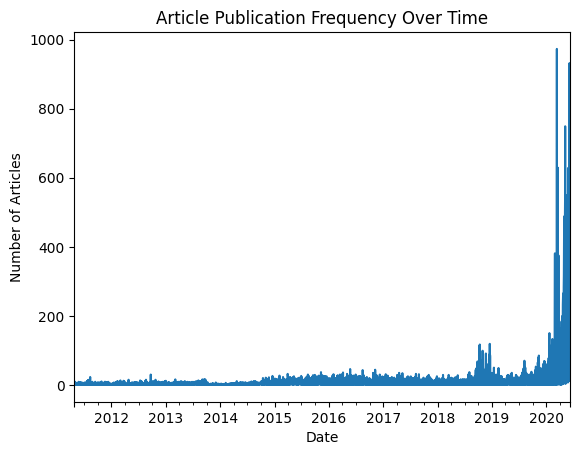

In [5]:
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['publication_time'] = df['publication_date'].dt.time
df.set_index('publication_date').resample('D').size().plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

Publisher Analysis


Most active publishers

In [6]:
articles_per_publisher = df['publisher'].value_counts()
print("Most Active Publishers:")
print(articles_per_publisher.head())

Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


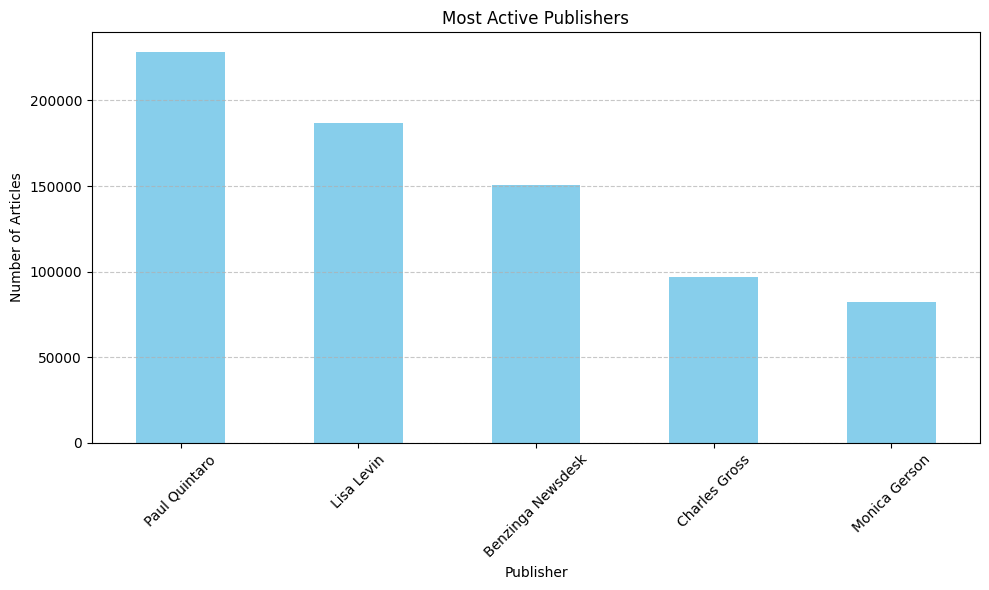

In [7]:
import matplotlib.pyplot as plt

# Publisher Analysis
## Most active publishers
articles_per_publisher = df['publisher'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
articles_per_publisher.head().plot(kind='bar', color='skyblue')
plt.title('Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

publishing times by publishers

In [8]:
publisher_time_analysis = df.groupby('publisher')['publication_time'].value_counts()
print("Analysis of Publishing Times by Publishers:")
print(publisher_time_analysis)

Analysis of Publishing Times by Publishers:
publisher                  publication_time
AARP                       11:54:21            2
                           12:08:29            1
Aaron Jackson.Ed           11:23:35            1
Aaron Levitt               15:53:06            3
                           14:06:14            2
                                              ..
vishwanath@benzinga.com    14:26:36            1
vivek.proactive@gmail.com  09:19:59            1
                           09:46:20            1
                           11:44:36            1
webmaster                  09:06:54            1
Name: count, Length: 33305, dtype: int64


 How does publication frequency vary over time?


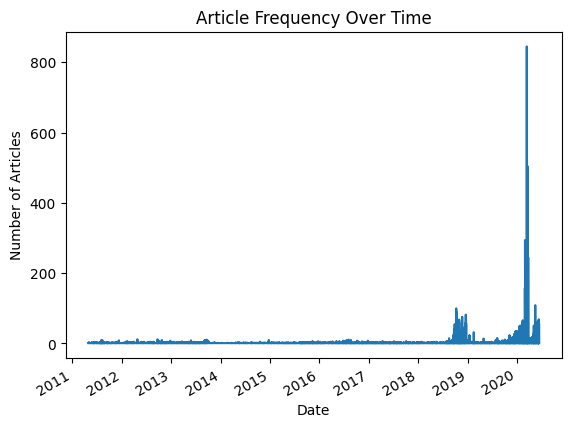

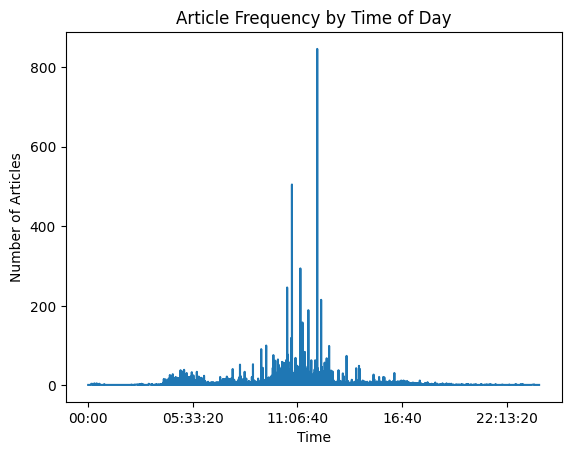

In [ ]:
import matplotlib.pyplot as plt

df['publication_date'] = pd.to_datetime(df['publication_date'])
articles_by_date = df['publication_date'].value_counts().sort_index()
articles_by_date.plot(title="Article Frequency Over Time", xlabel="Date", ylabel="Number of Articles")
plt.show()

# Analyze publication times (if time data is available)
if 'publication_time' in df.columns:
    df['publication_time'] = pd.to_datetime(df['publication_time'], format='%H:%M:%S').dt.time
    articles_by_time = df['publication_time'].value_counts().sort_index()
    articles_by_time.plot(title="Article Frequency by Time of Day", xlabel="Time", ylabel="Number of Articles")
    plt.show()

Which publishers contribute most?

In [13]:
from collections import Counter
from urllib.parse import urlparse

publisher_counts = df['publisher'].value_counts()


If email addresses are used as publisher names, identify unique domains

In [14]:
def extract_domain(email):
    try:
        domain = email.split('@')[1]
    except IndexError:
        domain = urlparse(email).netloc
    return domain

df['publisher_domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['publisher_domain'].value_counts()


 Display the results

In [ ]:

print("\nPublisher Counts:\n", publisher_counts)
print("\nDomain Counts:\n", domain_counts)